In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("/content/data-set for decision tree.csv")

In [ ]:
# Replace '?' with NaN
df.replace('?', pd.NA, inplace=True)

In [ ]:
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

<ipython-input-5-9ad0a117ca94>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


In [ ]:

# Separate features and target
X = df.drop(columns=['income'])  # Assuming 'income' is the target variable
y = df['income']

In [ ]:
# One-Hot Encoding of categorical variables
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X)


In [ ]:

# Convert to DataFrame
X_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out())

In [ ]:

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [ ]:

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = dt_model.predict(X_test)


In [ ]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
# Print metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.8120681713496085
Confusion Matrix:
 [[4482  494]
 [ 730  807]]
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.86      0.90      0.88      4976
        >50K       0.62      0.53      0.57      1537

    accuracy                           0.81      6513
   macro avg       0.74      0.71      0.72      6513
weighted avg       0.80      0.81      0.81      6513



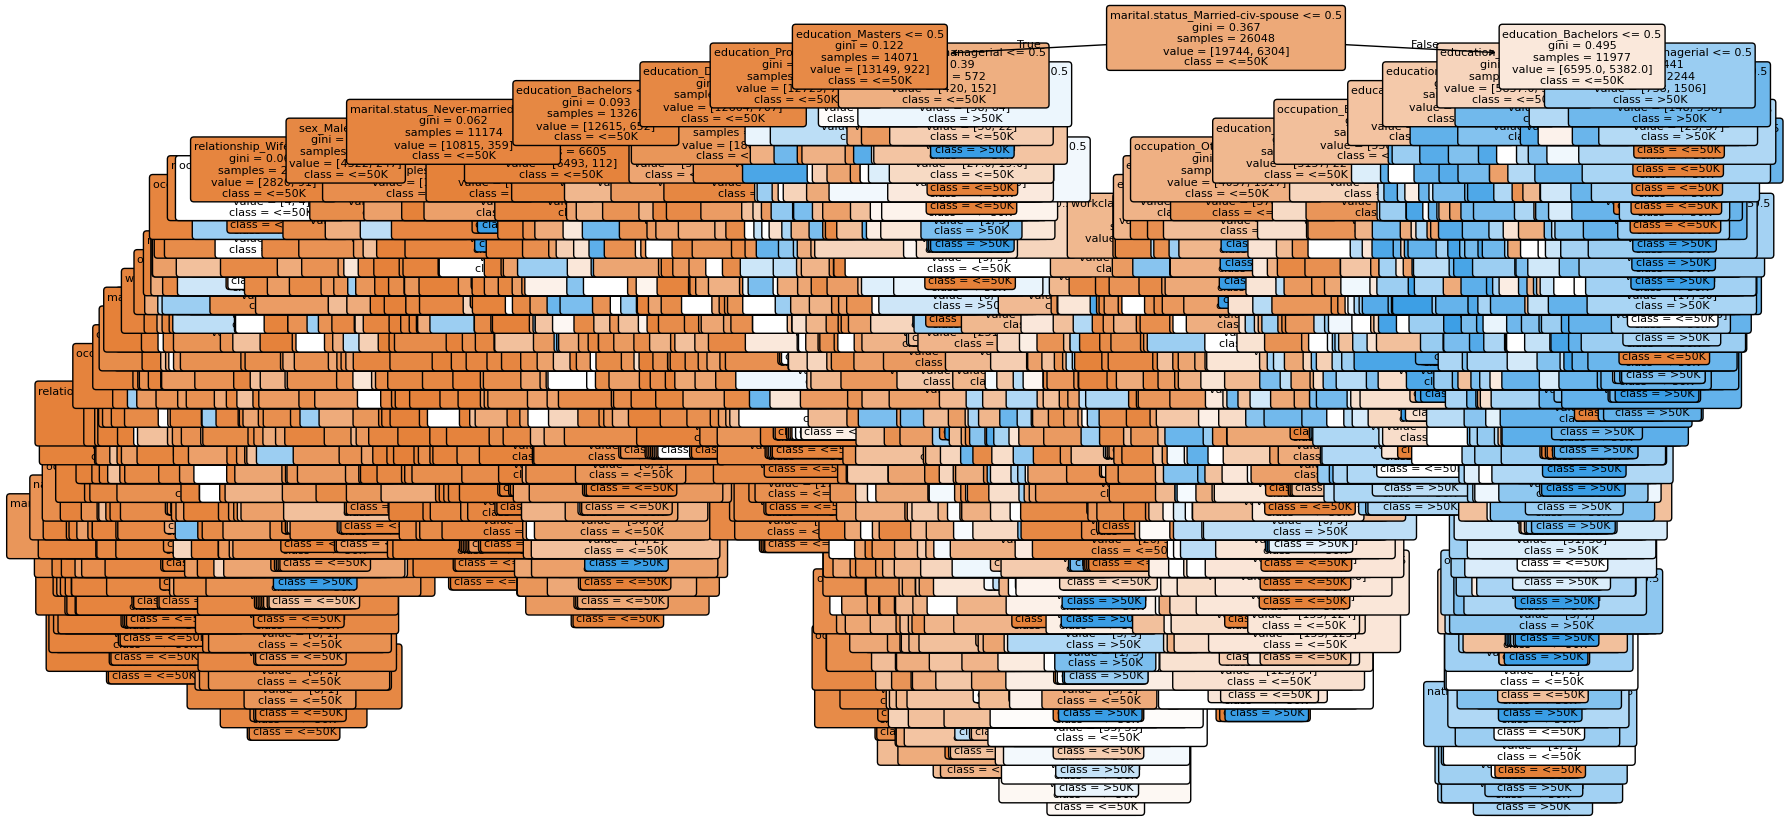

In [ ]:

# Plot Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=encoder.get_feature_names_out(), class_names=dt_model.classes_, filled=True, rounded=True, fontsize=8)
plt.show()
